<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">EMENTA</p>
<p class="last">Vamos separar em dois nivéis de apreendizado.</p>
1º Realizaremos um modelo simples e explicando o passo a passo matématicamente o que acontece com o modelo até ele encontrar a reta que melhor se encaixa entre os pontos.</p>
<dd>
<p> - Calculo modelo Regressão Linear populacional representado pela expressão: </p>
    <p> <span class="fgvmath"> $y$ = $\beta_0 + \beta_1.X + \epsilon$ </span> </p>
    
<p> - Calculo da correlação dos nossos dados representado pela expressão: </p>
   <p>  <span class="fgvmath">$r(x,y)$ = $ \frac {Sxy} {\sqrt Sxx * Syy}$  </span> </p>
    
</dd>
2º Usaremos a lib do <a class="reference internal" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" title="sklearn.linear_model.Ridge">
    <span class="pre">sklearn.linear_model.LinearRegression</span></code></a> para demonstrar a sua praticidade.</p>
</div>

# O que é Regressão Linear?

---

A Regressão Linear é uns dos algoritmos mas visto pelos cientista de dados no começo da carreira, e pra exemplificar de uma forma armonioza, vou exemplificar um tipo de problema que pode ser relvido com esse algorita.

Digamos que você queira saber o preço de venda de uma casa sua e acredita que existe um relacionamento entre as variáveis que você está considerando (área construída, número de quartos e localização) com esse preço. Seria possível fazer uma análise de regressão baseado nas outras casas da cidade, obter os pesos para os parâmetros em um modelo Regressão Linear e inferir qual o preço de venda que você deve colocar.

Ou até um mais simples que séria dizer o tamanho da asa de um pinguin dado a sua massa corporal, resumindo o objetivo da análise de regressão é explorar o relacionamento existente entre duas ou mais variáveis, visando obter informações sobre uma delas a partir dos valores conhecidas das outras.

Vale lembrar de um ponto importante, mas muito desconhecido, é que nos nossos problemas do cotidiano, muitas variáveis x e y aparentam estar relacionadas uma com a outra, porém de maneira não determinística.

Uma relação determínistica, por exemplo, é quando queremos saber a distância percorrida por um carro, mantendo velocidade constante $v$ ao longo de $\Delta t$ segundos. Nesse exemplo, sabemos que a distância percorrida será $\Delta s = v * \Delta t$, pois as variáveis estão relacionadas deterministicamente.

Vamos deixar um exemplo para tomar mais claro a explicação.

---

In [5]:
# importar pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

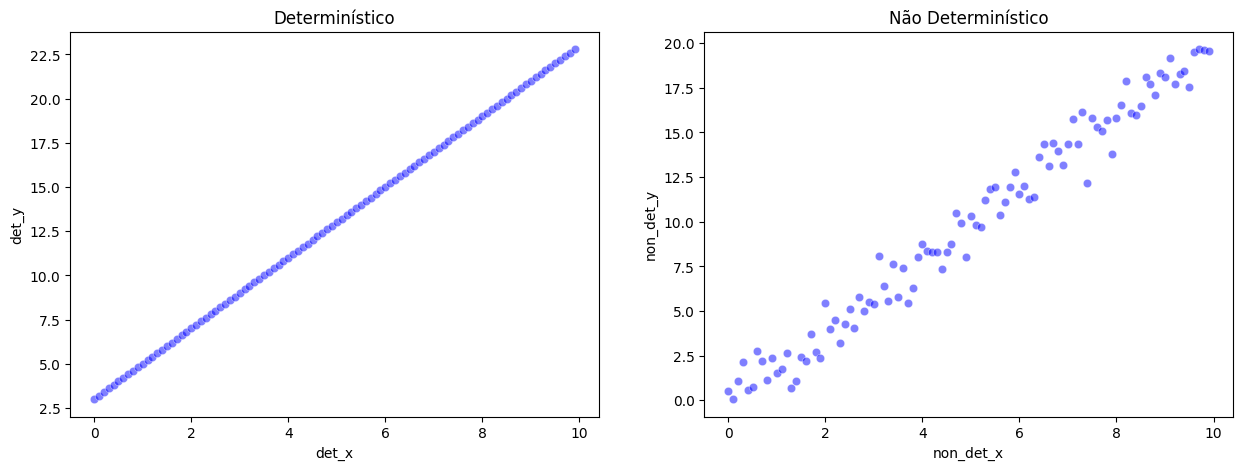

In [6]:
# exemplo de plots determinísticos
# random = igual manter estatico.
np.random.seed(42)
det_x = np.arange(0, 10, 0.1)
det_y = 2 * det_x + 3

# transformando em data frame deterministicos
series_det = pd.Series(det_y,det_x)
df_det = pd.DataFrame(series_det, columns = ['det_y'])
df_det.reset_index(drop = False, inplace = True)
df_det = df_det.rename(columns = {'index':'det_x'})

feature_name_det = "det_x"
target_name_det = "det_y"
data_det, target_det = df_det[[feature_name_det]], df_det[target_name_det]

# exemplo de plots não determinísticos
non_det_x = np.arange(0, 10, 0.1)
non_det_y = 2 * non_det_x + np.random.normal(size=100)

# transformando em data frame não deterministicos
series = pd.Series(non_det_y,non_det_x)
df_non = pd.DataFrame(series, columns = ['non_det_y'])
df_non.reset_index(drop = False, inplace = True)
df_non = df_non.rename(columns = {'index':'non_det_x'})

feature_name_non = "non_det_x"
target_name_non = "non_det_y"
data_non, target_non = df_non[[feature_name_non]], df_non[target_name_non]

plt.figure(figsize=(15,5), constrained_layout=False)

ax = plt.subplot(1,2,1)
ax = sns.scatterplot(data=df_det, x=feature_name_det, y=target_name_det,
                     color="blue", alpha=0.5)
ax.set_title("Determinístico")

ax = plt.subplot(1,2,2)
ax = sns.scatterplot(data=df_non, x=feature_name_non, y=target_name_non,
                     color="blue", alpha=0.5)
ax.set_title("Não Determinístico")

_ = plt.show()

<div class="alert alert-success" role="alert">
Olhando rapidamente você já consegue ver uma diferença importante, que apesar dos dois gráficos estarem mostrando pontos que se espalham sobre uma “reta virtual”, um deles não segue um padrão exato, determinístico. Parece que há algum tipo de aleatoriedade envolvida.</p>
Ou seja não temos uma relação perfeita entre as variavéis, isso significa que temos um modelo probabilístico, que captura a aleatoriedade que é inerente de qualquer processo do mundo real.</p>
</div>

# Matemática em ação calculo da Regressão Linear populacional
---
O calculo da Regressão Linear para encontrar um ponto que ainda não consta na base de dados pode ser definida pela expressão abaixo:

$y$ = $\beta_0 + \beta_1.X + \epsilon$

$y$ $\Rightarrow$ é a variável dependente, ou seja, o valor previsto.

$\beta_0$ $\Rightarrow$ é o coeficiente que intercepta ou que corta o eixo y.
 
$\beta_1$ $\Rightarrow$ é o coeficiente que define a inclinação da reta.

$X$ $\Rightarrow$ é a variável independente, ou seja, a variável preditora.

Para representar a relação entre uma variável dependente ($y$) e uma variável independente ($x$), usamos o modelo
que determina uma linha reta com inclinação $\beta_1$ e intercepto $\beta_0$, com a variável aleatória (erro) $\varepsilon$, considerada normalmente distribuída com $E(\varepsilon) = 0$.

Para simplificar, vamos assumir a premissa de que o valor médio da variável $\varepsilon$ para um dado valor de $x$ é $0$.

Outro ponto é que vamos ter que criar novas colunas tais como:

$\Rightarrow$ $\Sigma xiyi$

$\Rightarrow$ $\Sigma xi^2$

$\Rightarrow$ $\Sigma xi^2$

---

##### CALCULO $\beta_1$
O calcula de (inclinação)$\beta_1$ = $ \frac {n \Sigma xiyi - \Sigma xi \Sigma yi} {n \Sigma xi^2 - (\Sigma xi)^2} $

* $x$ $\Rightarrow$ posição no eixo $X$ do plano cartesiano.
* $y$ $\Rightarrow$ posição no eixo $Y$ do plano cartesiano.
* $i$ $\Rightarrow$ se refere ao i'ésimo valor de $X$ e $Y$.
* n $\Rightarrow$ número de pares ordenados utilizado na base.
* $\Sigma \Rightarrow$ letra grega que incida somatório.

In [7]:
# criando colunas necessárias para o calculo.
df_non['non_det_xy'] = df_non['non_det_x'] * df_non['non_det_y']
df_non['non_det_x^2'] = df_non['non_det_x'] ** 2
df_non['non_det_y^2'] = df_non['non_det_y'] ** 2

In [8]:
df_non.head()

,non_det_x,non_det_y,non_det_xy,non_det_x^2,non_det_y^2
0,0.0,0.496714,0.000000,0.00,0.246725
1,0.1,0.061736,0.006174,0.01,0.003811
2,0.2,1.047689,0.209538,0.04,1.097651
3,0.3,2.123030,0.636909,0.09,4.507256
4,0.4,0.565847,0.226339,0.16,0.320182


In [9]:
n = 100
sigmaXi = sum(df_non['non_det_x'])
sigmaYi= sum(df_non['non_det_y'])
sigmaXiYi =sum(df_non['non_det_xy'])
sigmaXi2 = sum(df_non['non_det_x^2'])

In [10]:
# certo 
print(f"Número de pares ordenados utilizado na base: {n}")
print(f"Somatorio da coluna X: {sigmaXi}")
print(f"Somatorio da coluna Y: {sigmaYi}")
print(f"Somatorio da coluna X e Y: {sigmaXiYi}")
print(f"Somatorio da coluna X ao quadrado: {sigmaXi2}")

Número de pares ordenados utilizado na base: 100
Somatorio da coluna X: 495.0
Somatorio da coluna Y: 979.6153482605905
Somatorio da coluna X e Y: 6527.205307231609
Somatorio da coluna X ao quadrado: 3283.5000000000005


In [11]:
b1 = ((n * sigmaXiYi) - (sigmaXi * sigmaYi)) / ((n * sigmaXi2) - (sigmaXi ** 2))
b1

2.0139325932693493

##### CALCULO $\beta_0$
O calculo de (intercepto)$\beta_0$ = $ \frac {\Sigma yi - \beta_1 \Sigma xi} {n} $

* $x$ $\Rightarrow$ posição no eixo $X$ do plano cartesiano.
* $y$ $\Rightarrow$ posição no eixo $Y$ do plano cartesiano.
* $i$ $\Rightarrow$ se refere ao i'ésimo valor de $X$ e $Y$.
* n $\Rightarrow$ número de pares ordenados utilizado na base.
* $\Sigma \Rightarrow$ letra grega que incida somatório.

In [12]:
n = 100
sigmaXi = sum(df_non['non_det_x'])
sigmaYi = sum(df_non['non_det_y'])

In [13]:
print(f"Número de pares ordenados utilizado na base: {n}")
print(f"Somatorio da coluna X: {sigmaXi}")
print(f"Somatorio da coluna Y: {sigmaYi}")
print(f"Coeficiente que define a inclinação da reta: {b1}")

Número de pares ordenados utilizado na base: 100
Somatorio da coluna X: 495.0
Somatorio da coluna Y: 979.6153482605905
Coeficiente que define a inclinação da reta: 2.0139325932693493


In [14]:
b0 = ((sigmaYi) - (b1 * sigmaXi)) / n
b0

-0.17281285407737415

In [15]:
# ficaria assim nossa formula final:
# b0 é o menor custo que ele pode ter.
# b1 vai +/- ser duas vezes o valor.
print(f"y = {b0} + {b1} * X")

y = -0.17281285407737415 + 2.0139325932693493 * X


In [16]:
# input do valor de x que não consta em nossos dados.
x = 4.65
y = b0 + (b1 * x)
y

9.1919737046251

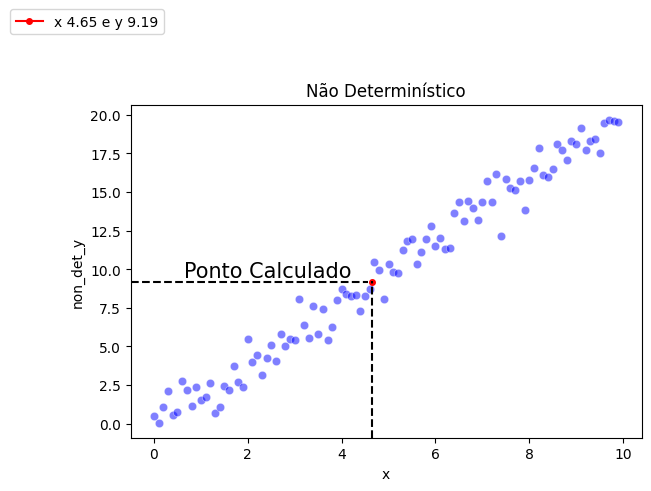

In [17]:
# encontrando o ponto no grafico com os valores de X e Y
point = pd.DataFrame({'x': [4.65], 'y': [9.19]})
plt.figure(constrained_layout=True)
ax = sns.scatterplot(data = df_non, x = feature_name_non, y = target_name_non, 
                     color = "blue", alpha = 0.5)

#plt.plot([x], [y], marker='o', markersize=4, color="red")

label = "x {0:.2f} e y {1:.2f}"
ax = point.plot(x='x', y='y', ax=ax, marker='o', markersize=4, color="red", label=label.format(x, y))
ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)

eixo_x = x
plt.axvline(x= eixo_x, ymin=0, ymax=0.47, color="black", linestyle="--")

eixo_y = y
plt.axhline(y= eixo_y, xmin=0, xmax=0.465, color="black", linestyle="--")

plt.annotate("Ponto Calculado", (.65, 9.5), fontsize=15)

_ = ax.set_title("Não Determinístico")

In [18]:
def linear_model(x, beta_um, beta_zero):
    """Linear model funcao y = a * x + b"""
    y = x * beta_um + beta_zero
    return y

In [19]:
reta_ajuste = linear_model(df_non['non_det_x'], b1, b0)

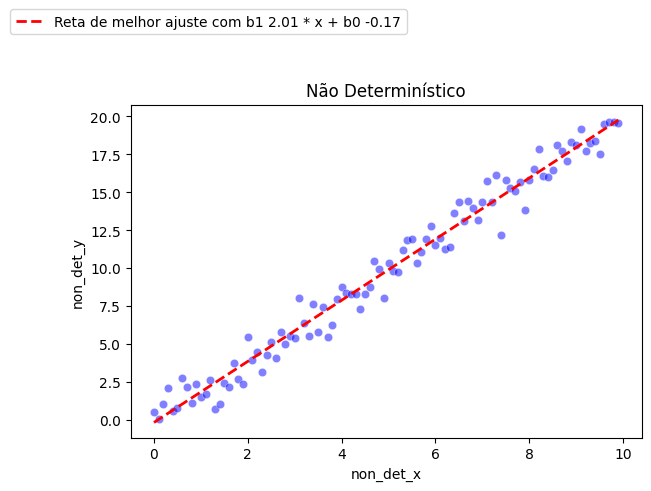

In [20]:
# Plot da reta de melhor ajuste
plt.figure(constrained_layout=True)
ax = sns.scatterplot(data=df_non, x=feature_name_non, y=target_name_non,
                     color="blue", alpha=0.5)

label = "Reta de melhor ajuste com b1 {0:.2f} * x + b0 {1:.2f}"
#plt.plot(non_det_x, ((non_det_x * b1) + b0),  color='r', linestyle='--', linewidth=2)
#ax.plot(non_det_x, reta_ajuste,  color='r', linestyle='--', linewidth=2)
ax.plot(df_non['non_det_x'], reta_ajuste, color='r', linestyle='--', linewidth=2 ,label=label.format(b1, b0))
ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)
_ = ax.set_title("Não Determinístico")
#_ = ax.set_title(label.format(b1, b0))

Acredito que vale a pena fazermos retas que não faz sentido no nosso modelo só para fins didaticos, pra isso vamos estipular alguns valores para $b1$ e $b0$ 

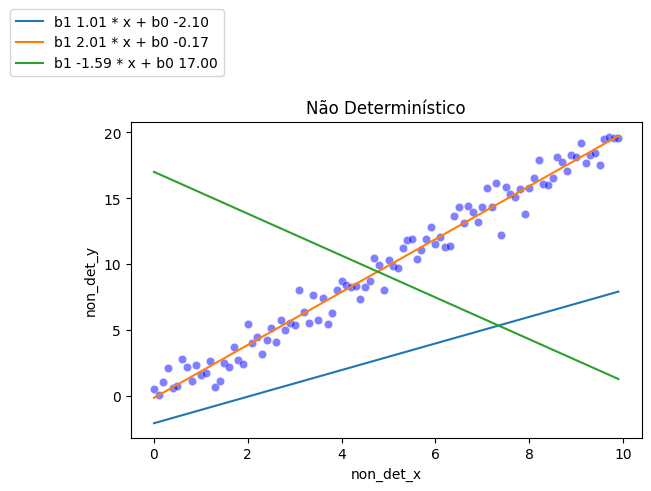

In [21]:
b_um = [1.01, 2.01, -1.59]
b_zero = [-2.1, -0.17, 17]

plt.figure(constrained_layout=True)
ax = sns.scatterplot(data=df_non, x=feature_name_non, y=target_name_non,
                     color="blue", alpha=0.5)

label = "b1 {0:.2f} * x + b0 {1:.2f}"
for b1, b0 in zip(b_um, b_zero):
    reta_ajuste = linear_model(df_non['non_det_x'], b1, b0)
    ax.plot(df_non['non_det_x'], reta_ajuste,
            label=label.format(b1, b0))

ax.legend(loc='center left', bbox_to_anchor=(-0.25, 1.25), ncol=1)
_ = ax.set_title("Não Determinístico") 

# Calculo da correlação dos nossos dados
---
#### O que é correlação?

A função do coeficiente de correlação é determinar qual é a intensidade da relação que existe entre conjuntos de dados ou informações conhecidas. O valor do coeficiente de correlação pode variar entre -1 e 1 e o resultado obtido define se a correlação é negativa ou positiva

![Predictor fit diagram](imagens/correlacao_p.png)

---

#### Expressão da correlação.

O calculo da expressão de correlação para encontrar se o nosso conjunto de dados tem uma forte ou baixa correlação pode ser definida pela expressão abaixo:

$r(x,y)$ = $ \frac {Sxy} {\sqrt Sxx * Syy}$ 

Sxx é o:

* Desvio-padrão de x:

$Sxx$ = $ \frac {\Sigma xi^2 - (\Sigma xi)^2} {n}$

Syy é o:

* Desvio-padrão de y:

$Sxx$ = $ \frac {\Sigma yi^2 - (\Sigma yi)^2} {n}$

Sxy é a:

* covariância de x, y:

$Sxy$ = $ \frac {\Sigma xiyi - (\Sigma xi * \Sigma yi)} {n}$

* $x$ $\Rightarrow$ posição no eixo $X$ do plano cartesiano.
* $y$ $\Rightarrow$ posição no eixo $Y$ do plano cartesiano.
* $i$ $\Rightarrow$ se refere ao i'ésimo valor de $X$ e $Y$.
* n $\Rightarrow$ número de pares ordenados utilizado na base.
* $\Sigma \Rightarrow$ letra grega que significa somatório.

In [22]:
n = 100
sigmaXi = sum(df_non['non_det_x'])
sigmaYi= sum(df_non['non_det_y'])
sigmaXiYi =sum(df_non['non_det_xy'])
sigmaXi2 = sum(df_non['non_det_x^2'])
sigmaYi2 = sum(df_non['non_det_y^2'])

In [23]:
print(f"Número de pares ordenados utilizado na base: {n}")
print(f"Somatorio da coluna X: {sigmaXi}")
print(f"Somatorio da coluna Y: {sigmaYi}")
print(f"Somatorio da coluna X e Y: {sigmaXiYi}")
print(f"Somatorio da coluna Y ao quadrado: {sigmaYi2}")
print(f"Somatorio da coluna X ao quadrado: {sigmaXi2}")

Número de pares ordenados utilizado na base: 100
Somatorio da coluna X: 495.0
Somatorio da coluna Y: 979.6153482605905
Somatorio da coluna X e Y: 6527.205307231609
Somatorio da coluna Y ao quadrado: 13057.55185831332
Somatorio da coluna X ao quadrado: 3283.5000000000005


In [24]:
sxx = sigmaXi2 - (sigmaXi ** 2) / 100
sxx

833.2500000000005

In [25]:
syy = sigmaYi2 - (sigmaYi ** 2) / 100
syy

3461.08955283614

In [26]:
sxy = sigmaXiYi - (sigmaXi * sigmaYi) / 100
sxy

1678.1093333416866

In [27]:
import math
r = sxy / math.sqrt(sxx * syy)
print(f"Obtemos uma relação forte positiva de {np.around(r*100,2)}%, ou seja as variavéis X e Y se conversão")

Obtemos uma relação forte positiva de 98.82%, ou seja as variavéis X e Y se conversão


# Utilizando a lib do sklearn
---

In [29]:
from sklearn.linear_model import LinearRegression
 
lm_model = LinearRegression()
lm_model.fit(non_det_x.reshape(-1,1), non_det_y)

b1 = lm_model.coef_
b0 = lm_model.intercept_

In [30]:
print("b0: \t{}".format(b0))
print("b1: \t{}".format(b1[0]))

b0: 	-0.17281285407737457
b1: 	2.0139325932693497


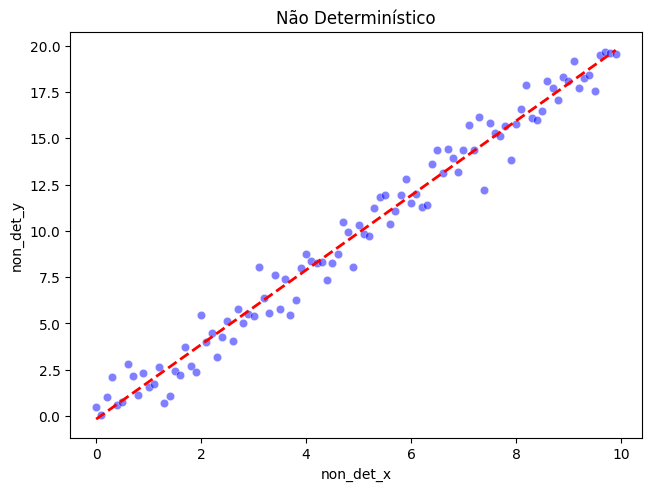

In [31]:
# Plot da reta de melhor ajuste
plt.figure(constrained_layout=True)
ax = sns.scatterplot(data=df_non, x=feature_name_non, y=target_name_non,
                     color="blue", alpha=0.5)
plt.plot(non_det_x, ((non_det_x * b1) + b0),  color='r', linestyle='--', linewidth=2)
_= ax.set_title("Não Determinístico")

In [32]:
# imprimindo o coeficiente de determinação
r_squared = lm_model.score(non_det_x.reshape(-1,1), non_det_y)
print(f'Coeficiente de Determinação: {r_squared}')

Coeficiente de Determinação: 0.976455254882662
